# Packages

You might also need to do `!pip install tdqm` (but, oddly, you don't have to import it). 
Okay you don't *need* to, but it gives you a loading bar, and i think lmfit gives you a nonfatal 
warning if you don't have it.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import lmfit as lf
import emcee

# me generating random data
and the usual `lmfit` stuff

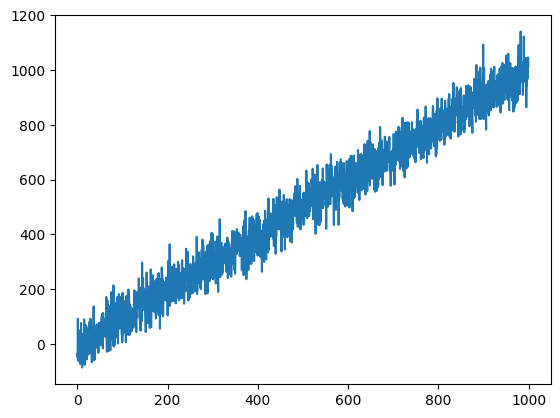

In [114]:
y = np.arange(0,1000, 0.5) + np.random.normal(0,50,2000)
plt.plot(x, y)

In [115]:
def linear(m, b, x):
    return m*x+b

linear_model = lf.Model(linear, independent_vars = 'x')

In [116]:
pars = linear_model.make_params()

# begin emcee stuff (soon)
I recommend using like leastsquares, nelder, or basinhopping to fit your function first, 
so you can get a good idea of what your parameters are. Then, **redefine your parameters**
with your updated upper and lower bounds, and set `value` equal to your best guess at the parameter.

In [117]:
pars.add('m', min = 0, max =5, value = 1)
pars.add('b', min = -20, max = 20, value = 2)

## this is *actually* the beginning of the emcee stuff
The three parameters listed below (`nwalkers`, `steps`, and `pos`) are specific to `emcee`.
- `nwalkers` is the number of Monte Carlo walkers that are computing you "loss" function at 
    each step. I think of them as "little dudes" that are wandering around in the space of possible
    parameter values (in this case, on a plane whose coordinates are "slope (m)" and "intercept (b)")
    trying to find the best spot.
- `steps` is the number of steps that you're giving them in order to find the best spot.
- and `pos` is an array of where the little dudes start. Notice the shape of the array:
    $n\_walkers \times num\_pars$

choose your own values for nwalkers and nsteps. I think in general `nwalkers` should be pretty high (200 is good),
and `steps` should be high enough that your parameters are converged. Don't make it *too* high, cuz then
it'll take 90 years to converge. What does converged mean? Well... If you run the following with 
`steps = 100`, then you'll probably get a warning that `The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s)`. Then, look at the plot of where the walkers walked (at the very bottom 
of this page). You'll probably see that the walkers have just *barely* agreed on a value of $m$. You 
want a stronger consensus between the little dudes.

In the block below, you'll see this `np.random.triangular` thing. In order to see what this distribution looks like, I've plotted the histograms of starting $m$ and $b$ below that. (along with the *triangular* probability density functions)

In [221]:
nwalkers = 200
steps = 100
pos = np.zeros((nwalkers, len(pars)))
for i, par in enumerate(pars):
    pos[:, i] = np.random.triangular(left = pars[par].min, 
                                     mode = pars[par].value, right = pars[par].max, size=nwalkers)

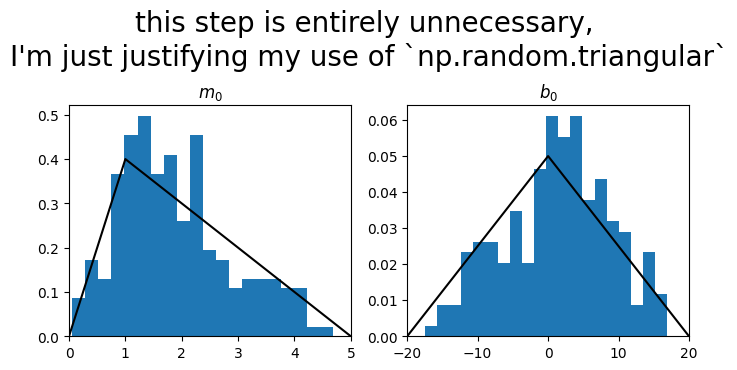

In [231]:
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.hist(pos[:, 0], bins=20, density=True)
plt.plot([0,1,5], [0,0.4,0], 'k')
plt.xlim(0,5)
plt.title('$m_0$')


plt.subplot(122)
plt.hist(pos[:, 1], bins=20, density=True)
plt.plot([-20, 0, 20], [0,0.05,0], 'k')
plt.xlim(-20,20)
plt.title('$b_0$')
plt.suptitle('this step is entirely unnecessary, \nI\'m just justifying my use of `np.random.triangular`',
             y=1.2,size=20)
plt.show()

In [148]:
result = linear_model.fit(data=y, params=pars, method='emcee', x=x,
                          fit_kws={'pos': pos, 'nwalkers': nwalkers, 'steps': steps}
                         )

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 231.21it/s]

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 2;
tau: [ 8.95123401 10.95361458]


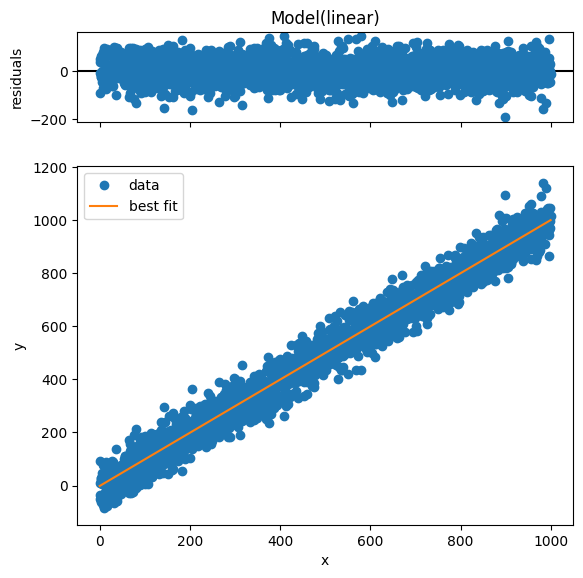

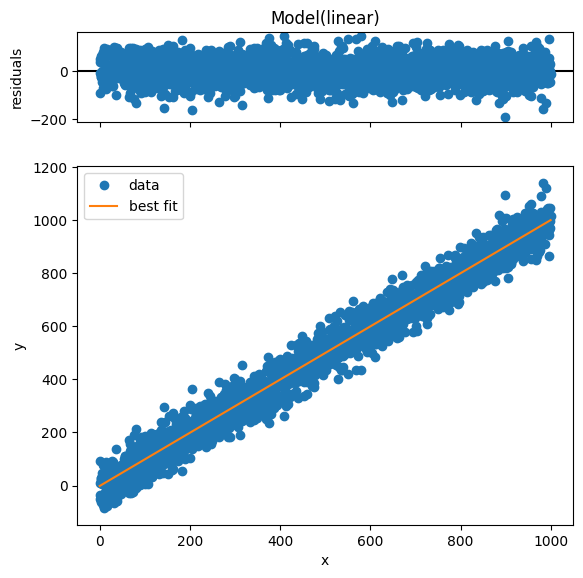

In [149]:
result.plot()

In [150]:
result

# plot of the last few steps' fits
It's clearly converged: this plot has... 2000 lines on it (if you keep `nwalkers` at 200),
and they're all overlapping

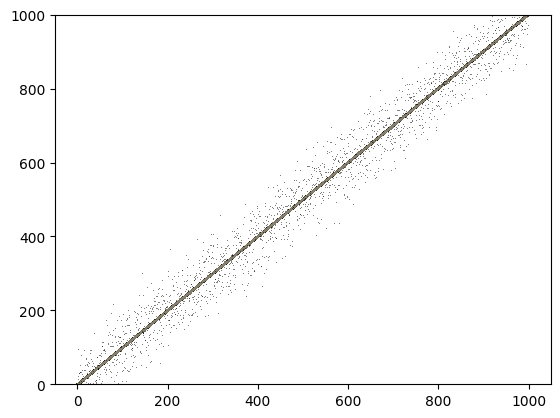

In [233]:
for s in range(10):
    for w in range(nwalkers):
        plt.plot(x, linear(*result.chain[-s-1, w, :], x), alpha = 0.1)
plt.ylim(0,1000)
plt.plot(x, y, 'k,', alpha = 0.5)

Text(0, 0.5, '$m$')

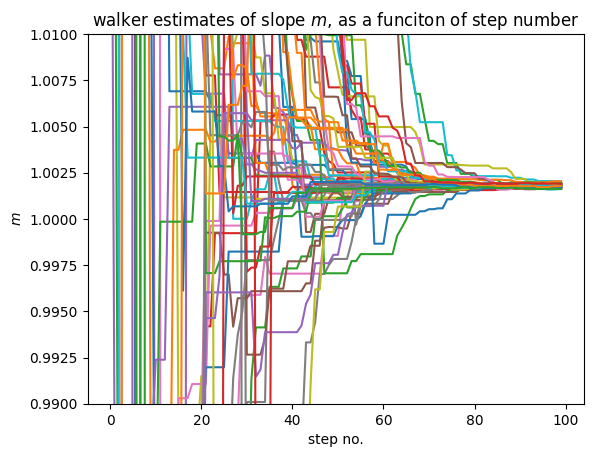

In [237]:
for w in range(64):
    plt.plot(result.chain[:, w, 0])
plt.ylim(0.99, 1.01)
plt.title('walker estimates of slope $m$, as a funciton of step number')
plt.xlabel('step no.')
plt.ylabel('$m$')